In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import matplotlib as mpl
import re

# My own BM

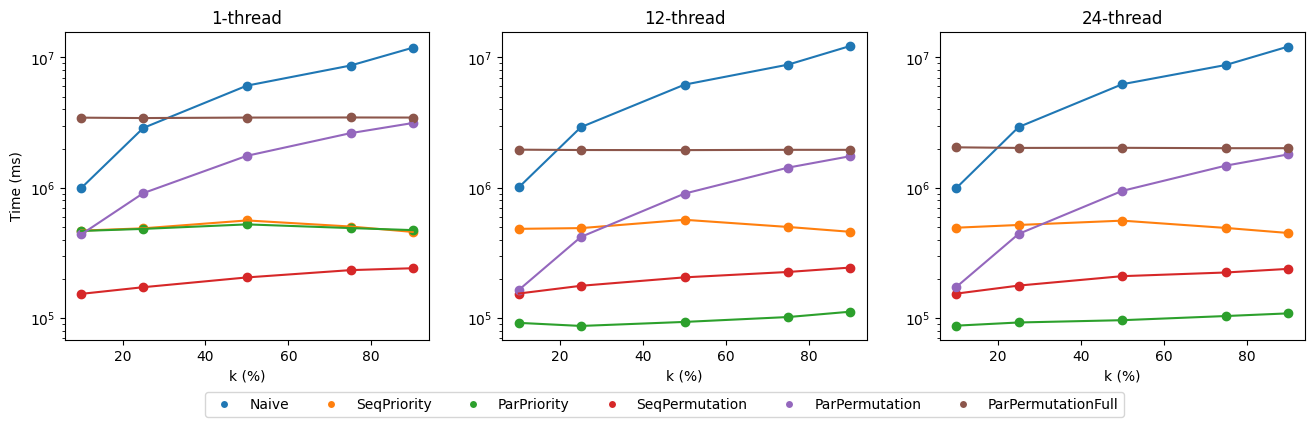

In [2]:
single_core = pd.read_csv("my_bench_results_1.csv")
multi_core = pd.read_csv("my_bench_results_12.csv")
hyper_core = pd.read_csv("my_bench_results_24.csv")

names = [name for name in single_core["algo"].unique()]
colors = mpl.colormaps.get_cmap("tab10")
colors = [colors(i) for i in range(len(names))]
custom_legends = [
    mpl.lines.Line2D([0], [0], marker="o", color="w", markerfacecolor=colors[i], label=name)
    for i, name in enumerate(names)
]

fig = plt.figure(figsize=(16, 4))

ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2, sharey=ax1)
ax3 = fig.add_subplot(1, 3, 3, sharey=ax1)

ax1.set_title("1-thread")
ax1.set_yscale("log")
ax1.set_ylabel("Time (ms)")
ax1.set_xlabel("k (%)")

ax2.set_title("12-thread")
ax2.set_xlabel("k (%)")

ax3.set_title("24-thread")
ax3.set_xlabel("k (%)")

for name, color in zip(names, colors):
    ax1.plot(sorted(single_core["k%"].unique()),
             single_core[single_core["algo"] == name].groupby("k%")["time(ms)"].mean(), color=color)
    ax1.scatter(sorted(single_core["k%"].unique()),
                single_core[single_core["algo"] == name].groupby("k%")["time(ms)"].mean(), color=color)
    ax2.plot(sorted(multi_core["k%"].unique()),
             multi_core[multi_core["algo"] == name].groupby("k%")["time(ms)"].mean(), color=color)
    ax2.scatter(sorted(multi_core["k%"].unique()),
                multi_core[multi_core["algo"] == name].groupby("k%")["time(ms)"].mean(), color=color)
    ax3.plot(sorted(hyper_core["k%"].unique()),
             hyper_core[hyper_core["algo"] == name].groupby("k%")["time(ms)"].mean(), color=color)
    ax3.scatter(sorted(hyper_core["k%"].unique()),
                hyper_core[hyper_core["algo"] == name].groupby("k%")["time(ms)"].mean(), color=color)

fig.legend(handles=custom_legends, loc="lower center", bbox_to_anchor=(0.5, -0.1), ncol=6)
plt.show()

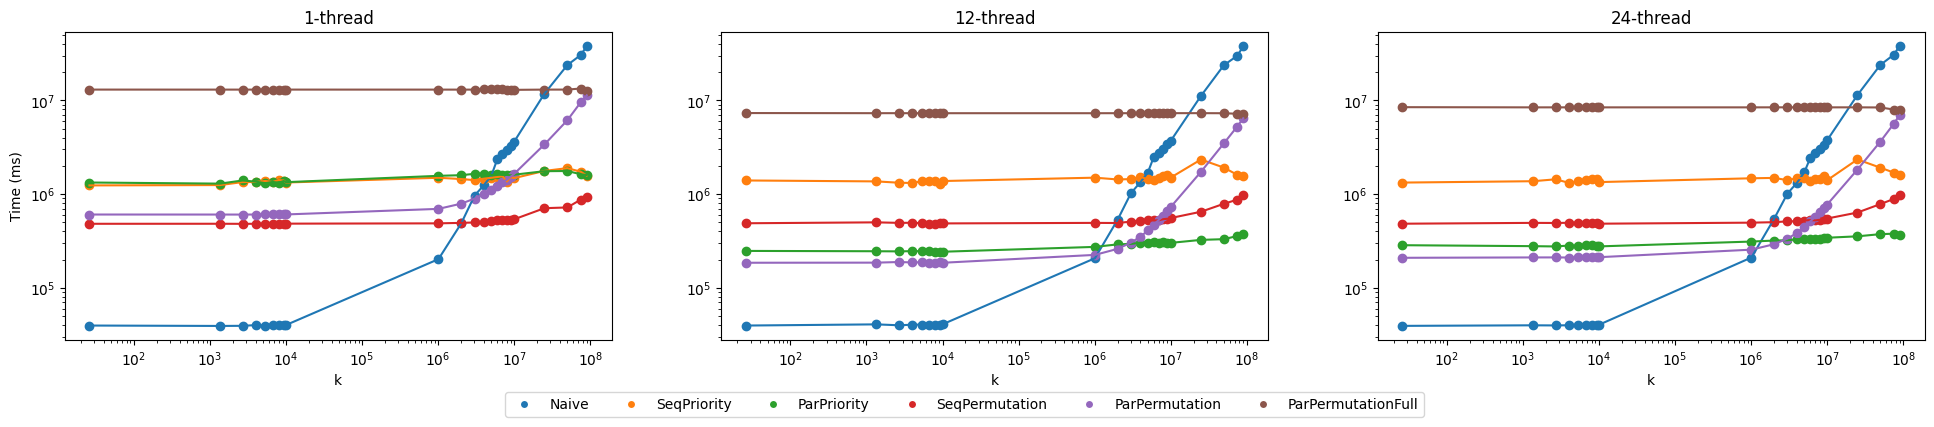

In [3]:
single_core = pd.read_csv("my_bench_results_1_100M.csv")
multi_core = pd.read_csv("my_bench_results_12_100M.csv")
hyper_core = pd.read_csv("my_bench_results_24_100M.csv")

names = [name for name in single_core["algo"].unique()]
colors = mpl.colormaps.get_cmap("tab10")
colors = [colors(i) for i in range(len(names))]
custom_legends = [
    mpl.lines.Line2D([0], [0], marker="o", color="w", markerfacecolor=colors[i], label=name)
    for i, name in enumerate(names)
]

fig = plt.figure(figsize=(24, 4))

ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2, sharey=ax1)
ax3 = fig.add_subplot(1, 3, 3, sharey=ax1)

ax1.set_title("1-thread")
ax1.set_yscale("log")
ax1.set_xscale("log")
ax1.set_ylabel("Time (ms)")
ax1.set_xlabel("k")

ax2.set_title("12-thread")
ax2.set_yscale("log")
ax2.set_xscale("log")
ax2.set_xlabel("k")

ax3.set_title("24-thread")
ax3.set_yscale("log")
ax3.set_xscale("log")
ax3.set_xlabel("k")

for name, color in zip(names, colors):
    ax1.plot(sorted(single_core["k"].unique()),
             single_core[single_core["algo"] == name].groupby("k")["time(ms)"].mean(), color=color)
    ax1.scatter(sorted(single_core["k"].unique()),
                single_core[single_core["algo"] == name].groupby("k")["time(ms)"].mean(), color=color)
    ax2.plot(sorted(multi_core["k"].unique()),
             multi_core[multi_core["algo"] == name].groupby("k")["time(ms)"].mean(), color=color)
    ax2.scatter(sorted(multi_core["k"].unique()),
                multi_core[multi_core["algo"] == name].groupby("k")["time(ms)"].mean(), color=color)
    ax3.plot(sorted(hyper_core["k"].unique()),
             hyper_core[hyper_core["algo"] == name].groupby("k")["time(ms)"].mean(), color=color)
    ax3.scatter(sorted(hyper_core["k"].unique()),
                hyper_core[hyper_core["algo"] == name].groupby("k")["time(ms)"].mean(), color=color)

fig.legend(handles=custom_legends, loc="lower center", bbox_to_anchor=(0.5, -0.1), ncol=6)
plt.show()

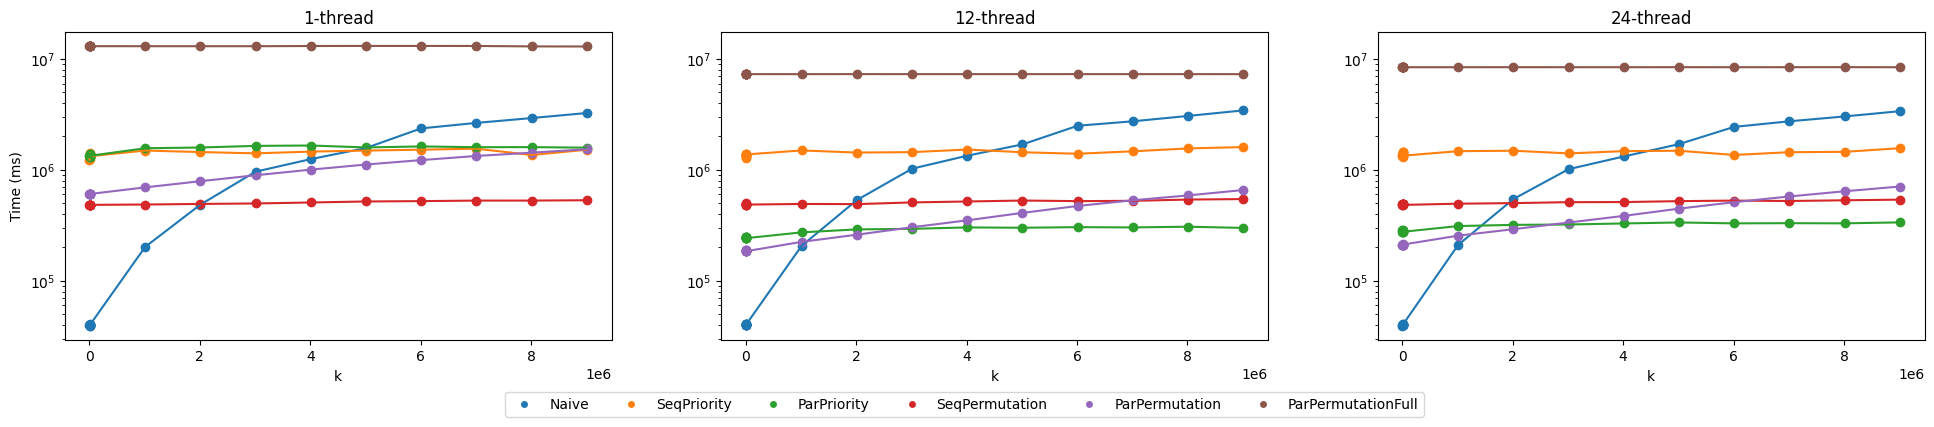

In [4]:
single_core = single_core[single_core["k"] < 100_000_000 / 100 * 10]
multi_core = multi_core[multi_core["k"] < 100_000_000 / 100 * 10]
hyper_core = hyper_core[hyper_core["k"] < 100_000_000 / 100 * 10]

names = [name for name in single_core["algo"].unique()]
colors = mpl.colormaps.get_cmap("tab10")
colors = [colors(i) for i in range(len(names))]
custom_legends = [
    mpl.lines.Line2D([0], [0], marker="o", color="w", markerfacecolor=colors[i], label=name)
    for i, name in enumerate(names)
]

fig = plt.figure(figsize=(24, 4))

ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2, sharey=ax1)
ax3 = fig.add_subplot(1, 3, 3, sharey=ax1)

ax1.set_title("1-thread")
ax1.set_yscale("log")
# ax1.set_xscale("log")
ax1.set_ylabel("Time (ms)")
ax1.set_xlabel("k")

ax2.set_title("12-thread")
ax2.set_yscale("log")
# ax2.set_xscale("log")
ax2.set_xlabel("k")

ax3.set_title("24-thread")
ax3.set_yscale("log")
# ax3.set_xscale("log")
ax3.set_xlabel("k")

for name, color in zip(names, colors):
    ax1.plot(sorted(single_core["k"].unique()),
             single_core[single_core["algo"] == name].groupby("k")["time(ms)"].mean(), color=color)
    ax1.scatter(sorted(single_core["k"].unique()),
                single_core[single_core["algo"] == name].groupby("k")["time(ms)"].mean(), color=color)
    ax2.plot(sorted(multi_core["k"].unique()),
             multi_core[multi_core["algo"] == name].groupby("k")["time(ms)"].mean(), color=color)
    ax2.scatter(sorted(multi_core["k"].unique()),
                multi_core[multi_core["algo"] == name].groupby("k")["time(ms)"].mean(), color=color)
    ax3.plot(sorted(hyper_core["k"].unique()),
             hyper_core[hyper_core["algo"] == name].groupby("k")["time(ms)"].mean(), color=color)
    ax3.scatter(sorted(hyper_core["k"].unique()),
                hyper_core[hyper_core["algo"] == name].groupby("k")["time(ms)"].mean(), color=color)

fig.legend(handles=custom_legends, loc="lower center", bbox_to_anchor=(0.5, -0.1), ncol=6)
plt.show()

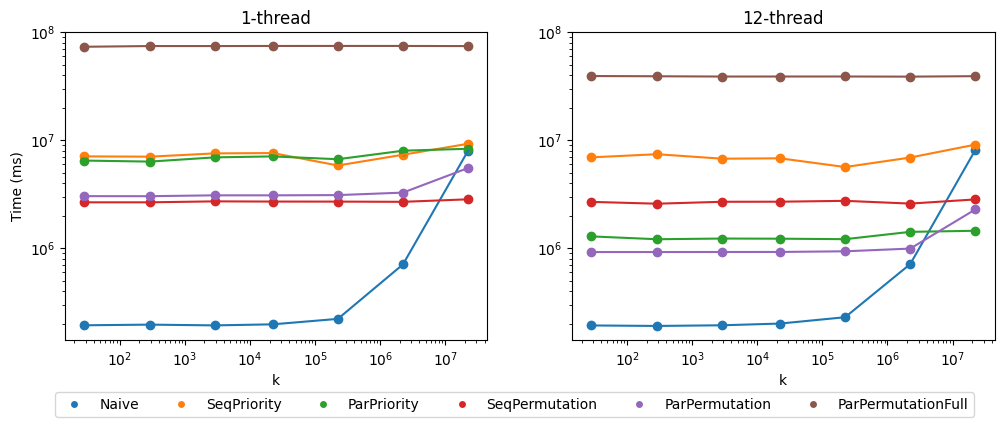

In [5]:
single_core = pd.read_csv("my_bench_results_1_500M.csv")
multi_core = pd.read_csv("my_bench_results_12_500M.csv")
# hyper_core = pd.read_csv("my_bench_results_24_500M.csv")

names = [name for name in single_core["algo"].unique()]
colors = mpl.colormaps.get_cmap("tab10")
colors = [colors(i) for i in range(len(names))]
custom_legends = [
    mpl.lines.Line2D([0], [0], marker="o", color="w", markerfacecolor=colors[i], label=name)
    for i, name in enumerate(names)
]

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2, sharey=ax1)
# ax3 = fig.add_subplot(1, 3, 3, sharey=ax1)

ax1.set_title("1-thread")
ax1.set_yscale("log")
ax1.set_xscale("log")
ax1.set_ylabel("Time (ms)")
ax1.set_xlabel("k")

ax2.set_title("12-thread")
ax2.set_yscale("log")
ax2.set_xscale("log")
ax2.set_xlabel("k")
# 
# ax3.set_title("24-thread")
# ax3.set_yscale("log")
# ax3.set_xscale("log")
# ax3.set_xlabel("k")

for name, color in zip(names, colors):
    ax1.plot(sorted(single_core["k"].unique()),
             single_core[single_core["algo"] == name].groupby("k")["time(ms)"].mean(), color=color)
    ax1.scatter(sorted(single_core["k"].unique()),
                single_core[single_core["algo"] == name].groupby("k")["time(ms)"].mean(), color=color)
    ax2.plot(sorted(multi_core["k"].unique()),
             multi_core[multi_core["algo"] == name].groupby("k")["time(ms)"].mean(), color=color)
    ax2.scatter(sorted(multi_core["k"].unique()),
                multi_core[multi_core["algo"] == name].groupby("k")["time(ms)"].mean(), color=color)
    # ax3.plot(sorted(hyper_core["k"].unique()),
    #          hyper_core[hyper_core["algo"] == name].groupby("k")["time(ms)"].mean(), color=color)
    # ax3.scatter(sorted(hyper_core["k"].unique()),
    #             hyper_core[hyper_core["algo"] == name].groupby("k")["time(ms)"].mean(), color=color)

fig.legend(handles=custom_legends, loc="lower center", bbox_to_anchor=(0.5, -0.1), ncol=6)
plt.show()

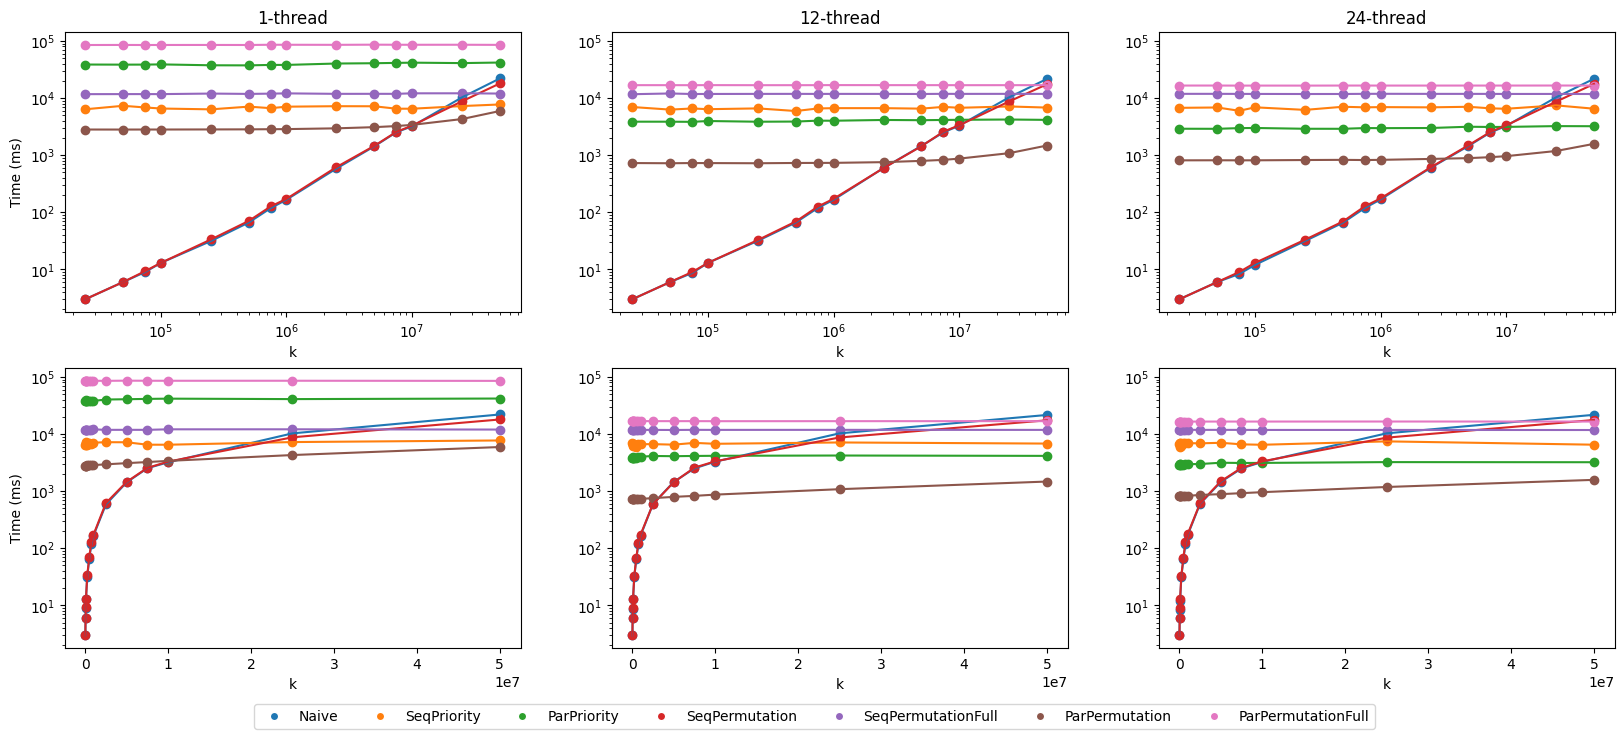

In [6]:
single_core = pd.read_csv("new_bench_results_1_500M.csv")
multi_core = pd.read_csv("new_bench_results_12_500M.csv")
hyper_core = pd.read_csv("new_bench_results_24_500M.csv")

names = [name for name in single_core["algo"].unique() if name != "SeqPermutationCopy"]
colors = mpl.colormaps.get_cmap("tab10")
colors = [colors(i) for i in range(len(names))]
custom_legends = [
    mpl.lines.Line2D([0], [0], marker="o", color="w", markerfacecolor=colors[i], label=name)
    for i, name in enumerate(names)
]

fig = plt.figure(figsize=(20, 8))

ax1 = fig.add_subplot(2, 3, 1)
ax2 = fig.add_subplot(2, 3, 2, sharey=ax1)
ax3 = fig.add_subplot(2, 3, 3, sharey=ax1)

ax1.set_title("1-thread")
ax1.set_yscale("log")
ax1.set_xscale("log")
ax1.set_ylabel("Time (ms)")
ax1.set_xlabel("k")

ax2.set_title("12-thread")
ax2.set_yscale("log")
ax2.set_xscale("log")
ax2.set_xlabel("k")

ax3.set_title("24-thread")
ax3.set_yscale("log")
ax3.set_xscale("log")
ax3.set_xlabel("k")

for name, color in zip(names, colors):
    ax1.plot(sorted(single_core["k"].unique()),
             single_core[single_core["algo"] == name].groupby("k")["time"].mean(), color=color)
    ax1.scatter(sorted(single_core["k"].unique()),
                single_core[single_core["algo"] == name].groupby("k")["time"].mean(), color=color)
    ax2.plot(sorted(multi_core["k"].unique()),
             multi_core[multi_core["algo"] == name].groupby("k")["time"].mean(), color=color)
    ax2.scatter(sorted(multi_core["k"].unique()),
                multi_core[multi_core["algo"] == name].groupby("k")["time"].mean(), color=color)
    ax3.plot(sorted(hyper_core["k"].unique()),
             hyper_core[hyper_core["algo"] == name].groupby("k")["time"].mean(), color=color)
    ax3.scatter(sorted(hyper_core["k"].unique()),
                hyper_core[hyper_core["algo"] == name].groupby("k")["time"].mean(), color=color)

ax1 = fig.add_subplot(2, 3, 4)
ax2 = fig.add_subplot(2, 3, 5, sharey=ax1)
ax3 = fig.add_subplot(2, 3, 6, sharey=ax1)

ax1.set_yscale("log")
ax1.set_ylabel("Time (ms)")
ax1.set_xlabel("k")

ax2.set_yscale("log")
ax2.set_xlabel("k")

ax3.set_yscale("log")
ax3.set_xlabel("k")

for name, color in zip(names, colors):
    ax1.plot(sorted(single_core["k"].unique()),
             single_core[single_core["algo"] == name].groupby("k")["time"].mean(), color=color)
    ax1.scatter(sorted(single_core["k"].unique()),
                single_core[single_core["algo"] == name].groupby("k")["time"].mean(), color=color)
    ax2.plot(sorted(multi_core["k"].unique()),
             multi_core[multi_core["algo"] == name].groupby("k")["time"].mean(), color=color)
    ax2.scatter(sorted(multi_core["k"].unique()),
                multi_core[multi_core["algo"] == name].groupby("k")["time"].mean(), color=color)
    ax3.plot(sorted(hyper_core["k"].unique()),
             hyper_core[hyper_core["algo"] == name].groupby("k")["time"].mean(), color=color)
    ax3.scatter(sorted(hyper_core["k"].unique()),
                hyper_core[hyper_core["algo"] == name].groupby("k")["time"].mean(), color=color)

fig.legend(handles=custom_legends, loc="lower center", bbox_to_anchor=(0.5, 0.00), ncol=10)
plt.show()

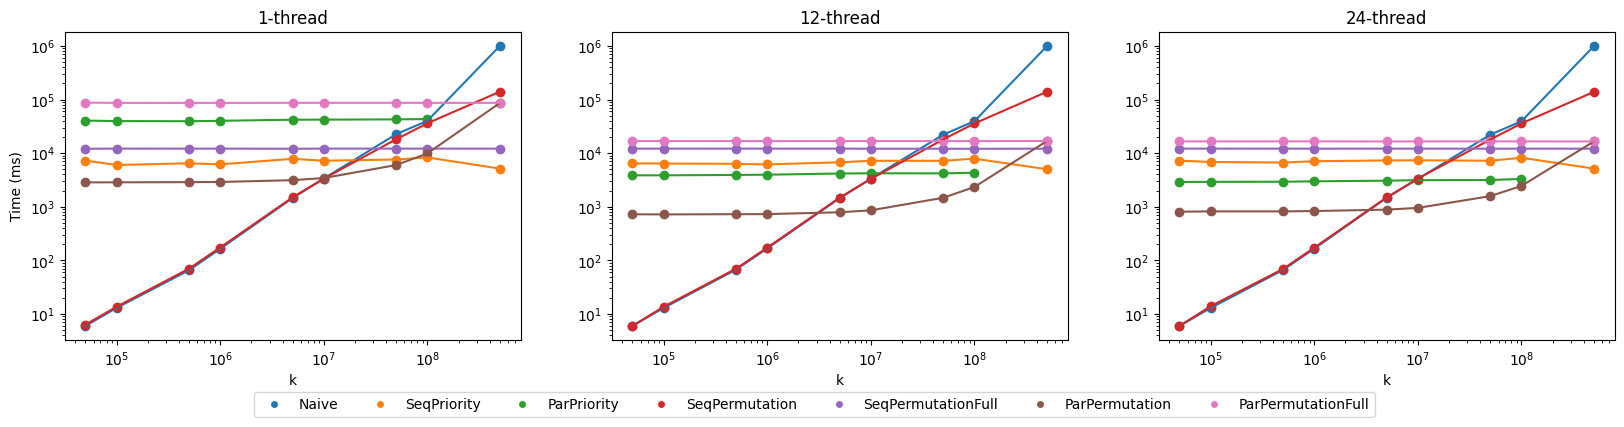

In [7]:
single_core = pd.read_csv("new_new_bench_results_1_500M.csv")
multi_core = pd.read_csv("new_new_bench_results_12_500M.csv")
hyper_core = pd.read_csv("new_new_bench_results_24_500M.csv")

names = [name for name in single_core["algo"].unique() if name != "SeqPermutationCopy"]
colors = mpl.colormaps.get_cmap("tab10")
colors = [colors(i) for i in range(len(names))]
custom_legends = [
    mpl.lines.Line2D([0], [0], marker="o", color="w", markerfacecolor=colors[i], label=name)
    for i, name in enumerate(names)
]

fig = plt.figure(figsize=(20, 4))

ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2, sharey=ax1)
ax3 = fig.add_subplot(1, 3, 3, sharey=ax1)

ax1.set_title("1-thread")
ax1.set_yscale("log")
ax1.set_xscale("log")
ax1.set_ylabel("Time (ms)")
ax1.set_xlabel("k")

ax2.set_title("12-thread")
ax2.set_yscale("log")
ax2.set_xscale("log")
ax2.set_xlabel("k")

ax3.set_title("24-thread")
ax3.set_yscale("log")
ax3.set_xscale("log")
ax3.set_xlabel("k")

for name, color in zip(names, colors):
    y = single_core[single_core["algo"] == name].groupby("k")["time"].mean()
    x = sorted(single_core["k"].unique())[:len(y)]
    ax1.plot(x, y, color=color)
    ax1.scatter(x, y, color=color)

    y = multi_core[multi_core["algo"] == name].groupby("k")["time"].mean()
    x = sorted(multi_core["k"].unique())[:len(y)]
    ax2.plot(x, y, color=color)
    ax2.scatter(x, y, color=color)

    y = hyper_core[hyper_core["algo"] == name].groupby("k")["time"].mean()
    x = sorted(hyper_core["k"].unique())[:len(y)]
    ax3.plot(x, y, color=color)
    ax3.scatter(x, y, color=color)

# ax1 = fig.add_subplot(2, 3, 4)
# ax2 = fig.add_subplot(2, 3, 5, sharey=ax1)
# ax3 = fig.add_subplot(2, 3, 6, sharey=ax1)

# ax1.set_yscale("log")
# ax1.set_ylabel("Time (ms)")
# ax1.set_xlabel("k")
# 
# ax2.set_yscale("log")
# ax2.set_xlabel("k")
# 
# ax3.set_yscale("log")
# ax3.set_xlabel("k")
# 
# for name, color in zip(names, colors):
#     y = single_core[single_core["algo"] == name].groupby("k")["time"].mean()
#     x = sorted(single_core["k"].unique())[:len(y)]
#     ax1.plot(x, y, color=color)
#     ax1.scatter(x, y, color=color)
# 
#     y = multi_core[multi_core["algo"] == name].groupby("k")["time"].mean()
#     x = sorted(multi_core["k"].unique())[:len(y)]
#     ax2.plot(x, y, color=color)
#     ax2.scatter(x, y, color=color)
# 
#     y = hyper_core[hyper_core["algo"] == name].groupby("k")["time"].mean()
#     x = sorted(hyper_core["k"].unique())[:len(y)]
#     ax3.plot(x, y, color=color)
#     ax3.scatter(x, y, color=color)
    
fig.legend(handles=custom_legends, loc="lower center", bbox_to_anchor=(0.5, -0.10), ncol=10)
plt.show()